# Import Library dan Upload Dataset

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns

In [5]:
# code ini untuk menghilangkan warning message saat kita menjalankan code-code
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load data kita ke sebuah dataframe bernama df
customer_data = pd.read_csv('/content/customer_data.csv')

#Eksplorasi Data Awal (EDA)

###Data Customer

In [13]:
#cek dimensi data customer
customer_data.shape

(2240, 9)

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   NumWebPurchases    2240 non-null   int64  
 7   NumStorePurchases  2240 non-null   int64  
 8   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


Berdasarkan informasi di atas, tipe data untuk kolom *Dt_Customer* seharusnya datetime karena berupa tanggal

In [15]:
customer_data.head(10)

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,9/4/2012,58,8,4,7
1,2174,1954,Graduation,46344.0,3/8/2014,38,1,2,5
2,4141,1965,Graduation,71613.0,8/21/2013,26,8,10,4
3,6182,1984,Graduation,26646.0,2/10/2014,26,2,4,6
4,5324,1981,PhD,58293.0,1/19/2014,94,5,6,5
5,7446,1967,Master,62513.0,9/9/2013,16,6,10,6
6,965,1971,Graduation,55635.0,11/13/2012,34,7,7,6
7,6177,1985,PhD,33454.0,5/8/2013,32,4,4,8
8,4855,1974,PhD,30351.0,6/6/2013,19,3,2,9
9,5899,1950,PhD,5648.0,3/13/2014,68,1,0,20


In [16]:
customer_data.groupby('Education').size()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

#Pre Processing

###Check Missing Value

In [17]:
customer_data.isna().sum()

ID                    0
Year_Birth            0
Education             0
Income               24
Dt_Customer           0
Recency               0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64

In [18]:
(customer_data.isna().sum() / customer_data.shape[0]) / 100

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Income               0.000107
Dt_Customer          0.000000
Recency              0.000000
NumWebPurchases      0.000000
NumStorePurchases    0.000000
NumWebVisitsMonth    0.000000
dtype: float64

###Duplicate Data

In [19]:
customer_data.duplicated().sum()

0

###Handling Data Type

In [20]:
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])

In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebPurchases    2240 non-null   int64         
 7   NumStorePurchases  2240 non-null   int64         
 8   NumWebVisitsMonth  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 157.6+ KB


###Data Typos

In [22]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebPurchases    2240 non-null   int64         
 7   NumStorePurchases  2240 non-null   int64         
 8   NumWebVisitsMonth  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 157.6+ KB


In [23]:
#Cek data typos disetiap kolom
typoDF2 = customer_data.select_dtypes(include=['object']).columns
for col in typoDF2:
  print(col)
  print(pd.DataFrame(customer_data[col].unique()))

Education
            0
0  Graduation
1         PhD
2      Master
3       Basic
4    2n Cycle


###Handling Missing Value

In [24]:
customer_data.isna().sum()

ID                    0
Year_Birth            0
Education             0
Income               24
Dt_Customer           0
Recency               0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
dtype: int64

In [25]:
customer_data.drop(customer_data[(customer_data['Income'].isnull())].index, inplace=True)

In [26]:
customer_data.isna().sum()

ID                   0
Year_Birth           0
Education            0
Income               0
Dt_Customer          0
Recency              0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
dtype: int64

###Check Outliers

In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Education          2216 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2216 non-null   datetime64[ns]
 5   Recency            2216 non-null   int64         
 6   NumWebPurchases    2216 non-null   int64         
 7   NumStorePurchases  2216 non-null   int64         
 8   NumWebVisitsMonth  2216 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 173.1+ KB


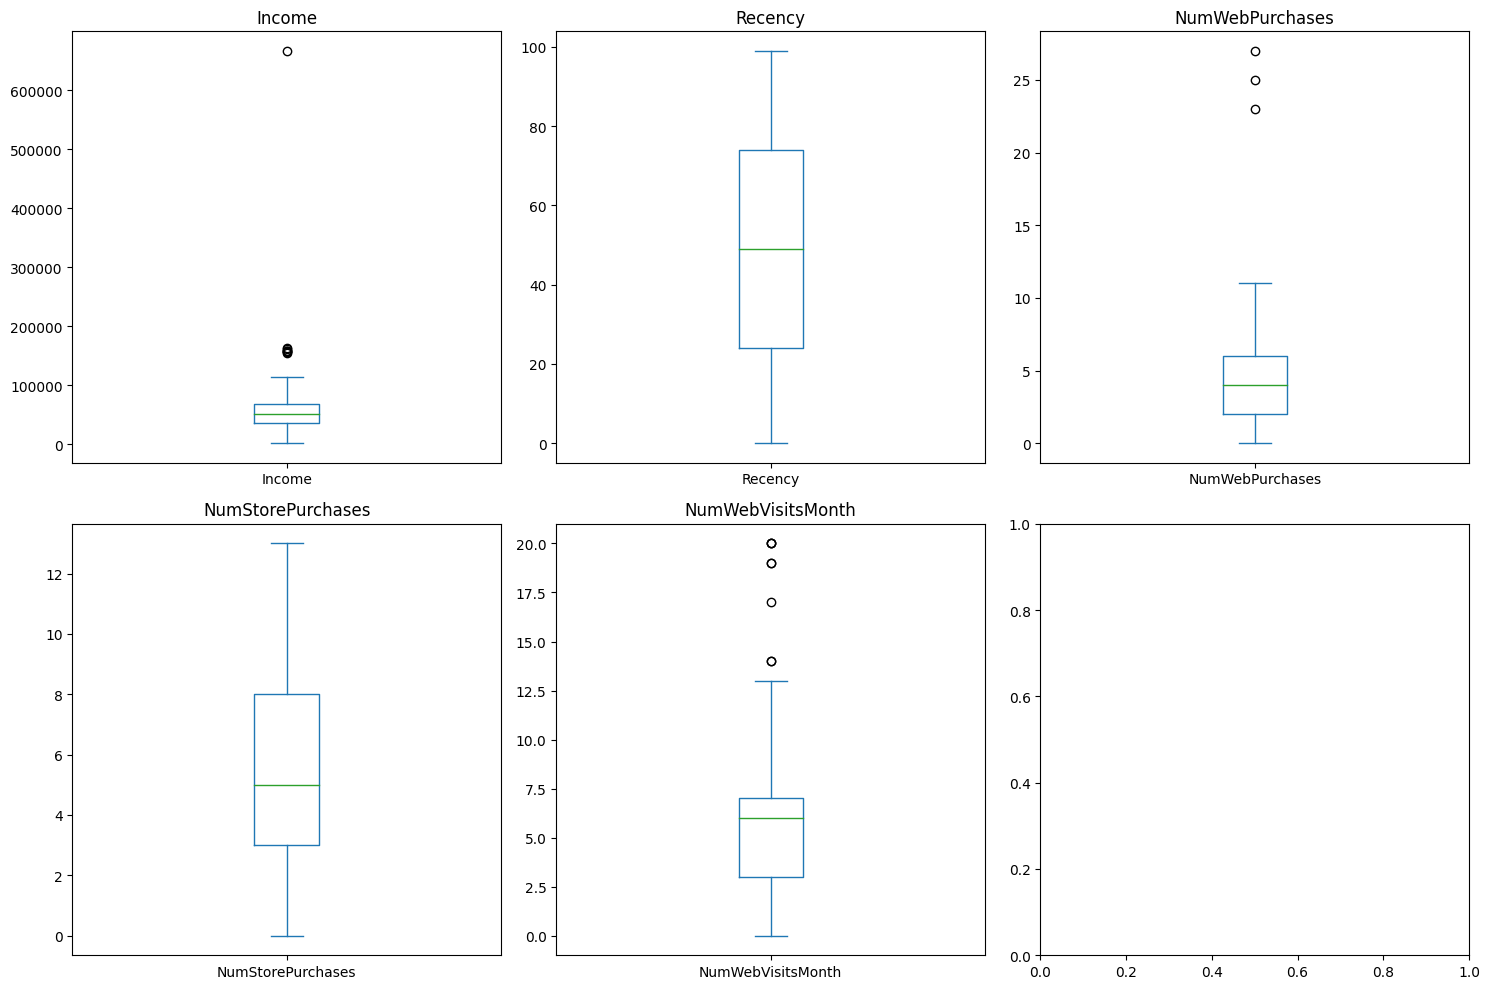

In [28]:
#Cek outliers pada kolom data numerical menggunakan visualisasi boxplot
ratio_data = ['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    customer_data[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


In [29]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(customer_data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(customer_data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(customer_data[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
      bound = np.where(customer_data[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [30]:
# Jumlah outliers kolom Income
upper_Income = cek_outlier('Income','upper_bound')
lower_Income = cek_outlier('Income','lower_bound')
print(f"Jumlah total outlier kolom Income : {len(upper_Income) + len(lower_Income)}")
#Jumlah outliers kolom Recency
upper_Recency = cek_outlier('Recency','upper_bound')
lower_Recency = cek_outlier('Recency','lower_bound')
print(f"Jumlah total outlier kolom Recency : {len(upper_Recency) + len(lower_Recency)}")
# Jumlah outliers kolom NumWebPurchases
upper_NumWebPurchases = cek_outlier('NumWebPurchases','upper_bound')
lower_NumWebPurchases = cek_outlier('NumWebPurchases','lower_bound')
print(f"Jumlah total outlier kolom NumWebPurchases : {len(upper_NumWebPurchases) + len(lower_NumWebPurchases)}")
# Jumlah outliers kolom NumStorePurchases
upper_NumStorePurchases = cek_outlier('NumStorePurchases','upper_bound')
lower_NumStorePurchases = cek_outlier('NumStorePurchases','lower_bound')
print(f"Jumlah total outlier kolom NumStorePurchases : {len(upper_NumStorePurchases) + len(lower_NumStorePurchases)}")
# Jumlah outliers kolom NumWebVisitsMonth
upper_NumWebVisitsMonth = cek_outlier('NumWebVisitsMonth','upper_bound')
lower_NumWebVisitsMonth = cek_outlier('NumWebVisitsMonth','lower_bound')
print(f"Jumlah total outlier kolom NumWebVisitsMonth : {len(upper_NumWebVisitsMonth) + len(lower_NumWebVisitsMonth)}")

Jumlah total outlier kolom Income : 8
Jumlah total outlier kolom Recency : 0
Jumlah total outlier kolom NumWebPurchases : 3
Jumlah total outlier kolom NumStorePurchases : 0
Jumlah total outlier kolom NumWebVisitsMonth : 9


###Handling Outliers

In [31]:
customer_data2 = customer_data.copy()

In [32]:
# Buat fungsi untuk filtering outliers
def filter_outlier(customer_data2, nama_kolom):
    if nama_kolom == 'Income':
        data_temp = customer_data2.loc[~customer_data2.index.isin(upper_Income)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_Income)]
        return data_temp
    if nama_kolom == 'Recency':
        data_temp = customer_data2.loc[~customer_data2.index.isin(upper_Recency)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_Recency)]
        return data_temp
    if nama_kolom == 'NumWebPurchases':
        data_temp = customer_data2.loc[~customer_data2.index.isin(upper_NumWebPurchases)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_NumWebPurchases)]
        return data_temp
    if nama_kolom == 'NumStorePurchases':
        data_temp = customer_data2.loc[~customer_data2.index.isin(upper_NumStorePurchases)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_NumStorePurchases)]
        return data_temp
    if nama_kolom == 'NumWebVisitsMonth':
        data_temp = customer_data2.loc[~customer_data2.index.isin(upper_NumWebVisitsMonth)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_NumWebVisitsMonth)]
        return data_temp

In [49]:
# Membersihkan outlier untuk kolom 'Income'
customer_data2_cleaned = filter_outlier(customer_data2, 'Income')

# Membersihkan outlier untuk kolom 'Recency'
customer_data2_cleaned = filter_outlier(customer_data2_cleaned, 'Recency')

# Membersihkan outlier untuk kolom 'NumWebPurchases'
customer_data2_cleaned = filter_outlier(customer_data2_cleaned, 'NumWebPurchases')

# Membersihkan outlier untuk kolom 'NumStorePurchases'
customer_data2_cleaned = filter_outlier(customer_data2_cleaned, 'NumStorePurchases')

# Membersihkan outlier untuk kolom 'NumWebVisitMonth'
customer_data2_cleaned = filter_outlier(customer_data2_cleaned, 'NumWebVisitsMonth')

In [50]:
#Cek 5 baris  pada df2_cleaned
customer_data2_cleaned.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5


In [37]:
customer_data.shape

(2216, 9)

In [51]:
customer_data2_cleaned.shape

(2196, 9)

###Label Encoding

In [39]:
customer_data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2205 non-null   int64         
 1   Year_Birth         2205 non-null   int64         
 2   Education          2205 non-null   object        
 3   Income             2205 non-null   float64       
 4   Dt_Customer        2205 non-null   datetime64[ns]
 5   Recency            2205 non-null   int64         
 6   NumWebPurchases    2205 non-null   int64         
 7   NumStorePurchases  2205 non-null   int64         
 8   NumWebVisitsMonth  2205 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 172.3+ KB


In [59]:
cat_columns = ['Education']
for col in cat_columns:
    customer_data2_cleaned[col] = customer_data2_cleaned[col].astype('category').cat.codes

customer_data2_cleaned.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,2,58138.0,2012-09-04,58,8,4,7
1,2174,1954,2,46344.0,2014-03-08,38,1,2,5
2,4141,1965,2,71613.0,2013-08-21,26,8,10,4
3,6182,1984,2,26646.0,2014-02-10,26,2,4,6
4,5324,1981,4,58293.0,2014-01-19,94,5,6,5


In [53]:
customer_data2_cleaned.groupby('Education').size()

Education
2n Cycle       197
Basic           54
Graduation    1107
Master         363
PhD            475
dtype: int64

#Identifikasi Korelasi

Identifikasi Korelasi antara variabel dependen (Income) dan variabel independen dan buat kesimpulan dari hasil perbandingan antara "income" dengan "strata pendidikan/Education"

In [63]:
# Calculate the correlation matrix
correlation_matrix = customer_data2_cleaned.corr()
# Korelasi variabel A dengan variabel lainnya
correlation_with_Income = correlation_matrix['Income'].sort_values(ascending=False)
# Tampilkan hasilnya
print(correlation_with_Income)

Income               1.000000
NumStorePurchases    0.526406
NumWebPurchases      0.386658
Education            0.125471
Dt_Customer          0.020892
ID                   0.012508
Recency             -0.005415
Year_Birth          -0.164506
NumWebVisitsMonth   -0.552269
Name: Income, dtype: float64


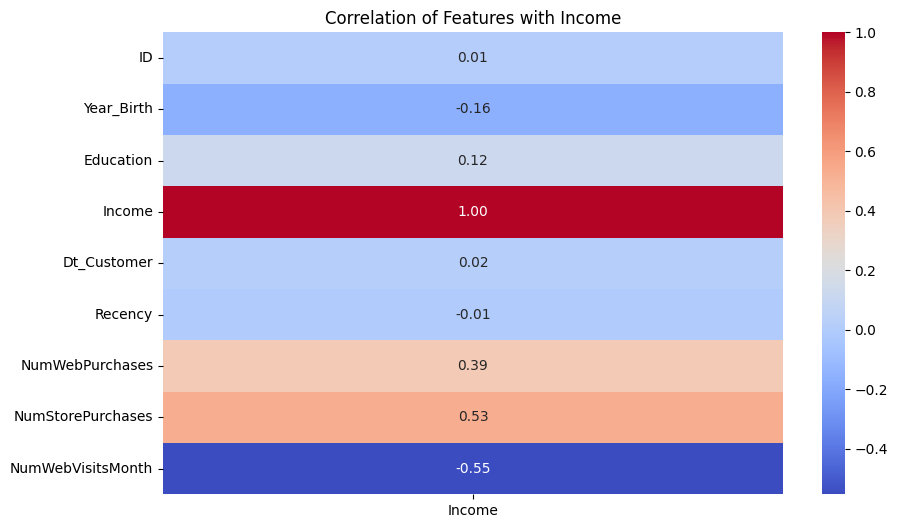

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Income']], annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation of Features with Income')
plt.show()

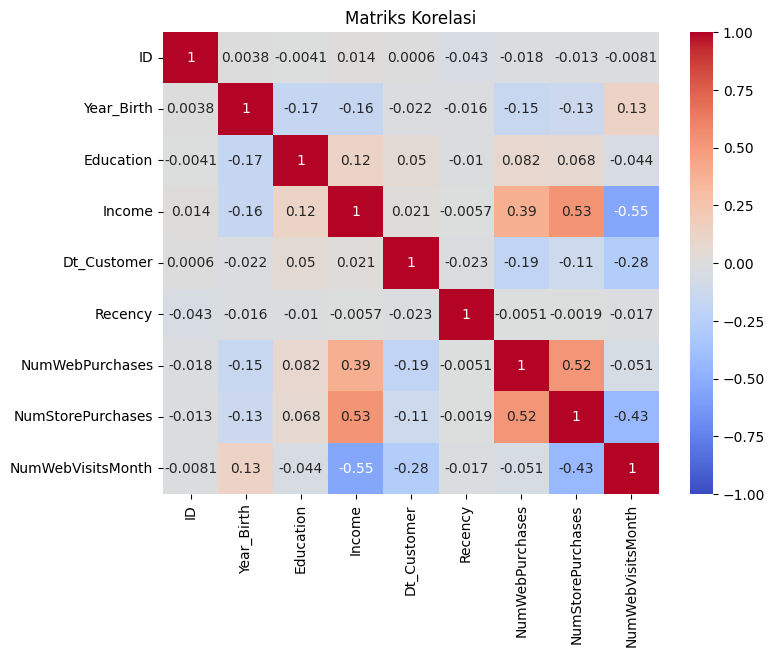

In [43]:
# Membuat plot matriks korelasi untuk semua variabel (opsional)
customer_data2_cleaned.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Menambahkan judul
plt.title('Matriks Korelasi')

# Menampilkan plot
plt.show()

#Korelasi Education - Income

In [64]:
# Calculate the correlation matrix
correlation_matrix = customer_data2_cleaned.corr()
# Korelasi variabel A dengan variabel lainnya
correlation_with_Income = correlation_matrix['Income'].sort_values(ascending=False)
correlation_income_education = correlation_with_Income['Education']
# Tampilkan hasilnya
print(correlation_income_education)

0.12547142508903364


Berdasarkan hasil korelasi antara *Education* dengan *Income*, kita dapat menyimpulkan bahwa pendidikan seseorang **tidak terlalu berpengaruh** terhadap pendapatan mereka masing-masing. Hal ini dibuktikan dengan hasil korelasi mendekati 0 yaitu 0.12547142508903364. Dikarenakan hasil mendekati 0, maka ikatan korelasi antara *Education* dengan *Income* tergolong lemah.

Jika melihat rata-rata pendapatan berdasarkan strata pendidikan, income dari orang yang baru lulus atau freshgraduate bisa mendekati orang yang bergelar Master. Hal ini membuktikan bahwa income seseorang tidak terlalu dipengaruhi oleh strata pendidikan.

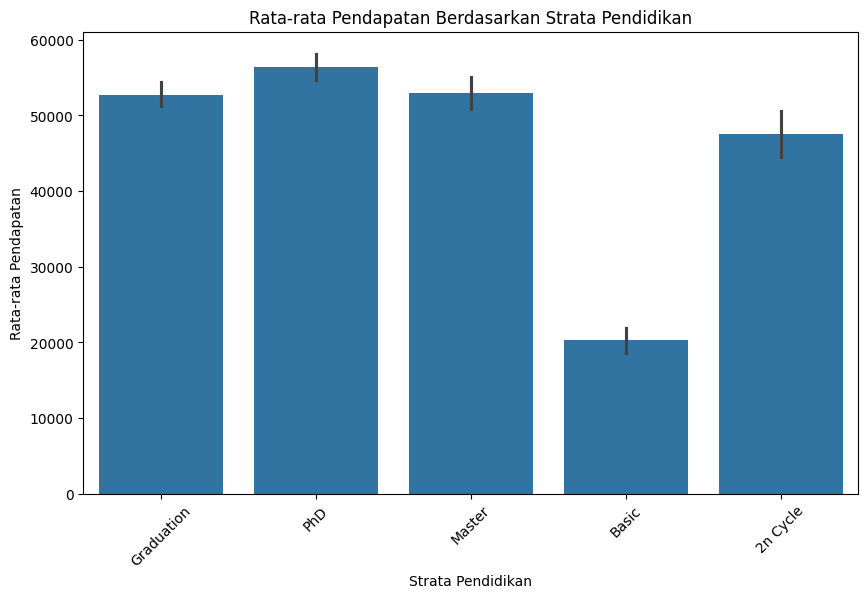

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=customer_data2_cleaned)
plt.title('Rata-rata Pendapatan Berdasarkan Strata Pendidikan')
plt.xlabel('Strata Pendidikan')
plt.ylabel('Rata-rata Pendapatan')
plt.xticks(rotation=45)
plt.show()